# Anomaly Detection

In [123]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
from scipy import stats
from sklearn.metrics import f1_score
 
 
data = loadmat('ex8data1.mat')  
X = data['X'] 
print(X.shape)

(307, 2)


[Text(0.5, 0, 'speed (Mb/s)'), Text(0, 0.5, 'ping(ms)')]

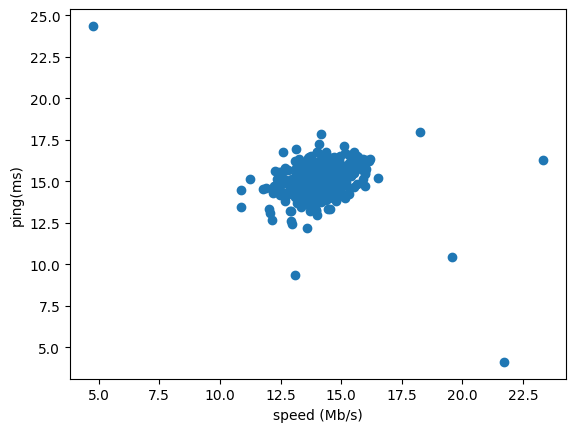

In [124]:
_, ax = plt.subplots(1)
scatter = ax.scatter(X[:, 0], X[:, 1])
ax.set(xlabel="speed (Mb/s)", ylabel="ping(ms)")
#_ = ax[0].legend(
    #scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
#)

[Text(0.5, 0, 'ping(ms)')]

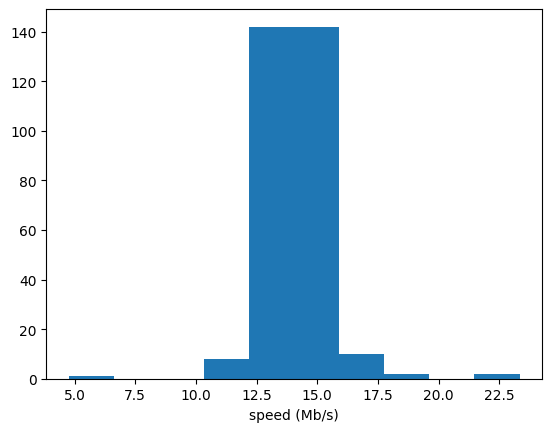

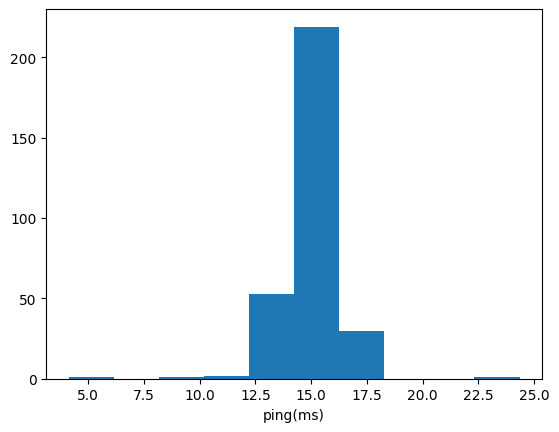

In [125]:
_, ax = plt.subplots(1)
scatter = ax.hist(X[:, 0])
ax.set(xlabel="speed (Mb/s)")

_, ax = plt.subplots(1)
scatter = ax.hist(X[:, 1])
ax.set(xlabel="ping(ms)")

In [126]:
def estimate_gaussian(X : np.ndarray):  
 
    sigma = X.std(axis=0)
    mu = X.mean(axis=0)
 
    return mu, sigma

paramters = estimate_gaussian(X)
print(paramters)

(array([14.11222578, 14.99771051]), array([1.35374717, 1.3075723 ]))


In [127]:
Xval = data['Xval']  
yval = data['yval']
print(Xval.shape)
print(yval.shape)

(307, 2)
(307, 1)


In [128]:
normik = stats.norm(loc = paramters[0], scale = paramters[1])
X_prob = normik.pdf(X)
Xval_prob = normik.pdf(Xval)
print(X_prob)

[[2.16209766e-01 2.99284746e-01]
 [2.57452082e-01 1.95392360e-01]
 [2.94132233e-01 2.46318960e-01]
 [2.47211916e-01 2.03532847e-01]
 [2.72515466e-01 2.33693033e-01]
 [2.91811896e-01 1.45498944e-01]
 [1.87139581e-01 2.56009184e-01]
 [1.51176483e-01 2.41513408e-01]
 [9.35633051e-02 1.99499131e-01]
 [1.66608997e-01 3.04234834e-01]
 [2.93387080e-01 9.03757846e-02]
 [2.94487687e-01 2.87662344e-01]
 [2.55592373e-01 2.77971214e-01]
 [2.55956210e-01 2.71738636e-01]
 [2.93271402e-01 1.28818680e-01]
 [2.94445597e-01 2.80876874e-01]
 [2.92880166e-01 2.99754412e-01]
 [2.85183307e-01 3.04633203e-01]
 [2.77277592e-01 2.49464313e-01]
 [9.48976543e-02 1.02581058e-01]
 [2.70272714e-01 2.80112059e-01]
 [2.93421614e-01 3.01193924e-01]
 [2.41105554e-01 1.55160458e-01]
 [2.93042880e-01 2.97354362e-01]
 [1.96077288e-01 2.10442712e-01]
 [1.56529793e-01 1.58947532e-01]
 [2.75904586e-01 2.86657540e-01]
 [2.57496215e-01 2.94850510e-01]
 [2.76670469e-01 2.92137100e-01]
 [2.83495304e-01 2.70338163e-01]
 [1.706828

In [129]:
def select_threshold(pval, yval):
  bf1 = 0
  bthres = 0
  for tres in np.linspace(pval.min(), pval.max(), 10000).tolist():
    t = pval <= tres
    y = np.logical_or(t[:,0],t[:,1])
    f1 = f1_score(yval, y)
    if f1 > bf1:
      bf1 = f1
      bthres = tres
    return bthres, bf1
  
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
normik = stats.norm(loc = paramters[0][0], scale = paramters[1][0])
pval[:,0] = normik.pdf(X[:, 0])
normik = stats.norm(loc = paramters[0][1], scale = paramters[1][1])
pval[:,1] = normik.pdf(X[:, 1])
  
(best_epsilon, best_f1) = select_threshold(pval, yval)
print((best_epsilon, best_f1))

(2.9769651952733143e-16, 0.2)


In [130]:
t1 = X_prob[:, 0] < best_epsilon
t2 = X_prob[:, 1] < best_epsilon
y = np.logical_or(t1,t2).astype(int)
anomalies = np.where(y == 1)
#print(anomalies, y)
AN = np.zeros((anomalies[0].shape[0], 2))
for ii in range (0, anomalies[0].shape[0]):
    AN[ii, 0] = X[anomalies[0][ii], 0]
    AN[ii, 1] = X[anomalies[0][ii], 1]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


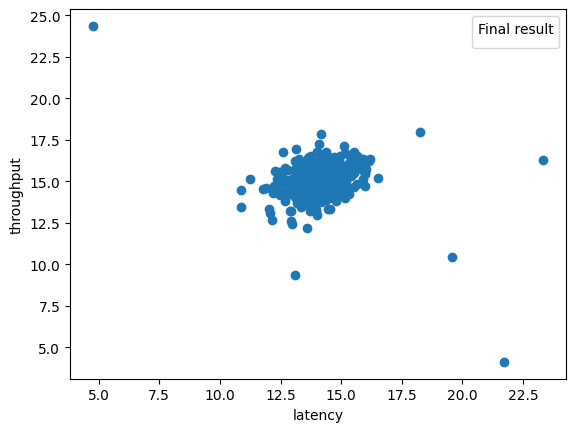

In [131]:
_, ax = plt.subplots(1)
scatter = ax.scatter(X[:,0], X[:,1])
scatter = ax.scatter(AN[:,0], AN[:,1], s=200, facecolors='none', edgecolors='r')
ax.set(xlabel="latency", ylabel="throughput")
ax.legend(title = 'Final result')

[Text(0.5, 0, 'latency')]

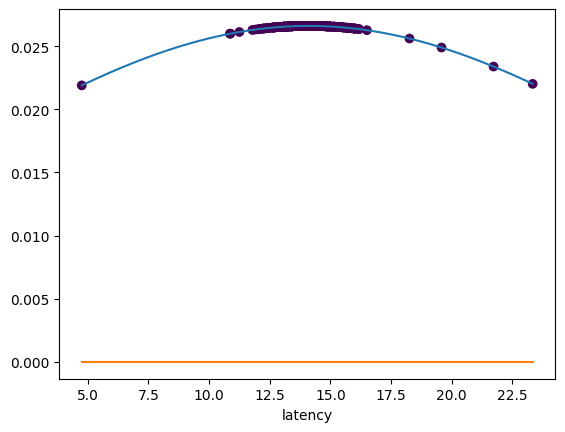

In [132]:
_, ax = plt.subplots(1)
x_g = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
scatter = ax.plot(x_g, stats.norm.pdf(x_g, paramters[0][0], paramters[0][1]))
scatter = ax.scatter(X[:, 0], stats.norm.pdf(X[:, 0], paramters[0][0], paramters[0][1]), c=y)
ax.plot([X[:, 0].min(), X[:, 0].max()], [best_epsilon, best_epsilon])
ax.set(xlabel="latency")

[Text(0.5, 0, 'throughput')]

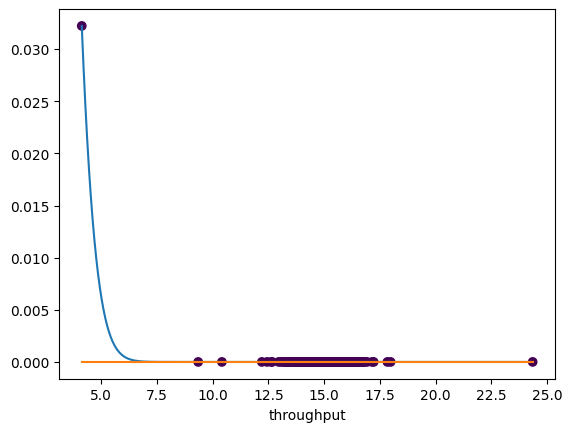

In [133]:
_, ax = plt.subplots(1)
x_g = np.linspace(X[:, 1].min(), X[:, 1].max(), 1000)
scatter = ax.plot(x_g, stats.norm.pdf(x_g, paramters[1][0], paramters[1][1]))
scatter = ax.scatter(X[:, 1], stats.norm.pdf(X[:, 1], paramters[1][0], paramters[1][1]), c=y)
ax.plot([X[:, 1].min(), X[:, 1].max()], [best_epsilon, best_epsilon])
ax.set(xlabel="throughput")